Overview:
In this project, I will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

Case Study:
In this project, I will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. My task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products.
By conducting exploratory data analysis, we will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, we will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.


In [1]:
from google.colab import files

#promt the user to select the file
uploaded = files.upload()


Saving Online Retail.xlsx to Online Retail.xlsx


In [2]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns    # For advanced data visualization
from datetime import datetime  # For handling date and time data


In [3]:
# Loading file into a data frame

df = pd.read_excel('Online Retail.xlsx')

#lets check the first few rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.tail(5) #to display bottom 5 rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
#checking the types of data
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [6]:
# checking for missing values
missing_values = df.isnull().sum()
print(missing_values)


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Since the Description column contains the product description which can't be replaced with some statistical measures therefore it's best to drop them and even though the 'CustomerID' column has a significant number of missing values I don't have any method to impute the missing values in the 'CustomerID' column.  Plus I think if we don't have a customerID which is a unique number given to each customer then why are we including it.

In [7]:
#Let's drop rows where 'CustomerID' and 'Description' are missing
df = df.dropna(subset=['Description', 'CustomerID'])

In [8]:
#Let's check again the missing values after the dropna operation
missing_values_after= df.isnull().sum()
print(missing_values_after)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


We got rid of all the missing values.

In [9]:
#Now let's look at the summary statistics
summary_stats = df.describe()
print(summary_stats)

            Quantity                    InvoiceDate      UnitPrice  \
count  406829.000000                         406829  406829.000000   
mean       12.061303  2011-07-10 16:30:57.879207424       3.460471   
min    -80995.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-06 15:02:00       1.250000   
50%         5.000000            2011-07-31 11:48:00       1.950000   
75%        12.000000            2011-10-20 13:06:00       3.750000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       248.693370                            NaN      69.315162   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  


Let's closely monitor the results:
1. Quantity:
Count: The total number of non-null entries in the 'Quantity' column is 406,829.

Mean: The average quantity per transaction is approximately 12.06.
Std (Standard Deviation): The standard deviation is quite high (248.69), indicating a wide range in the quantity of items purchased.

Min: The minimum quantity is -80,995, which is unusual. A negative quantity might be an indicator of returns or data entry errors but this seems like an error for sure.

25% (Q1): 25% of the transactions have a quantity of 2 or less.

50% (Median, Q2): The median quantity is 5, indicating that 50% of the transactions have a quantity of 5 or less.

75% (Q3): 75% of the transactions have a quantity of 12 or less.

Max: The maximum quantity is 80,995, which is also unusual and might require further investigation.


2. UnitPrice:
Count: The total number of non-null entries in the 'UnitPrice' column is 406,829.

Mean: The average unit price is approximately 3.46.

Std (Standard Deviation): The standard deviation is 69.32, indicating a wide range in unit prices.

Min: The minimum unit price is 0, which might be an indicator of free items or data entry errors.

25% (Q1): 25% of the transactions have a unit price of 1.25 or less.
50% (Median, Q2): The median unit price is 1.95.

75% (Q3): 75% of the transactions have a unit price of 3.75 or less.

Max: The maximum unit price is 38,970, which is quite high and might require further investigation.

3. CustomerID statistics doesn't make sense.

# **Removing duplicate values**
This is a large dataset with more than 400K+ rows so there are high chances of duplicate values.

In [10]:
df.shape

(406829, 8)

In [11]:
#checking duplicate rows
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape)

Number of duplicate rows:  (5225, 8)


In [12]:
df.count() #checking current number of rows before removing duplicate rows

InvoiceNo      406829
StockCode      406829
Description    406829
Quantity       406829
InvoiceDate    406829
UnitPrice      406829
CustomerID     406829
Country        406829
dtype: int64

In [13]:
df = df.drop_duplicates() # to drop duplicate rows
df.count()

InvoiceNo      401604
StockCode      401604
Description    401604
Quantity       401604
InvoiceDate    401604
UnitPrice      401604
CustomerID     401604
Country        401604
dtype: int64

Now compare the before and after results and you'll notice that 5225 rows have been removed.

# Dropping Missing or null values
Before dropping any missing values we always need to check if they are not in signifcant numbers otherwise we need to find a way to replace them.


In [14]:
print(df.isnull().sum()) #To count the missing values

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


There are no missing values. We can now proceed further.

# Checking for outliers
Earlier when we were looking at the summary statistics, we noticed that there are certain extreme values for the Quantity and Price columns. Let's investigate them further.

<Axes: xlabel='Quantity'>

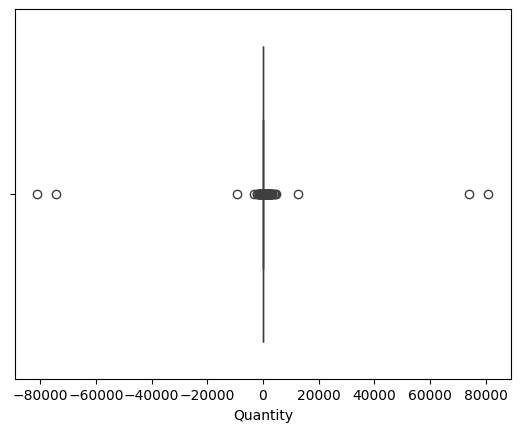

In [15]:
sns.boxplot(x=df['Quantity']) # visualizing quantity column

In context of retail dataset negative quantities may indicate a return but in this scenario this seems like an error due to high number values. Similarly we can see quantities in the right also display unusually high values, we'll need to remove them from our dataset.

In [16]:
# Drop rows with negative quantities
df = df[df['Quantity'] > 0]

# Check the dataset after dropping negative entries
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [17]:
df.shape

(392732, 8)

<Axes: xlabel='Quantity'>

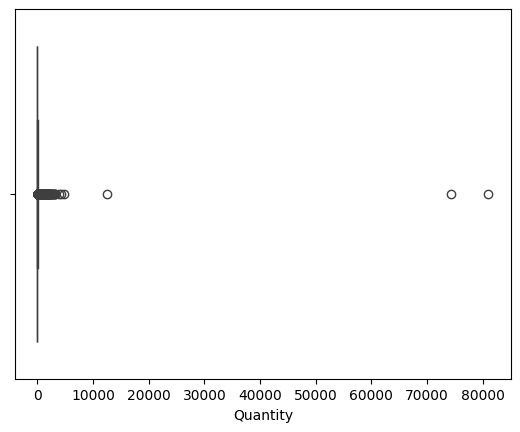

In [18]:
sns.boxplot(x=df['Quantity']) # visualizing quantity column

We got rid of all the negative values, erlier we had 401604 and got rid of 8872 negative values, now we'll focus on the positive high values.

Now in order to deal with positive high order quantities, I have decided to remove quantities which are 3*(std_dev ) away from the mean.

In [19]:
# Calculate the mean and standard deviation of the 'Quantity' column
mean_quantity = df['Quantity'].mean()
std_quantity = df['Quantity'].std()

# Define the threshold for outliers (3 times the standard deviation)
threshold = 3 * std_quantity

# Create a boolean mask to identify outliers
outliers_mask = (df['Quantity'] > mean_quantity + threshold) | (df['Quantity'] < mean_quantity - threshold)

# Remove outliers from the DataFrame
df_no_outliers = df[~outliers_mask]

# Check the DataFrame after removing outliers
print(df_no_outliers.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


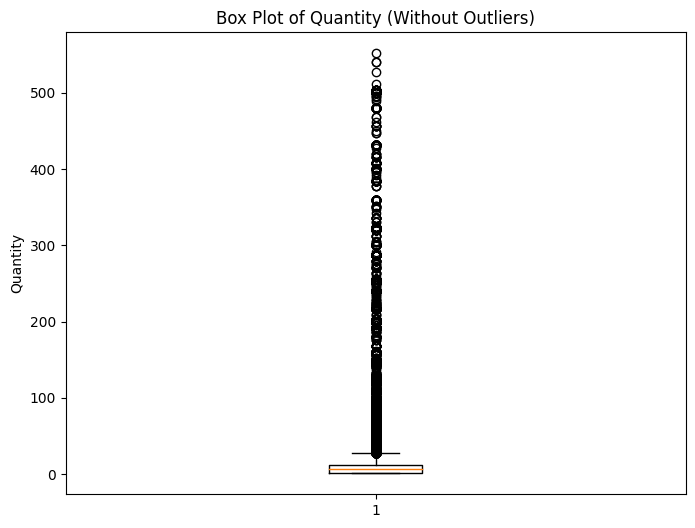

In [20]:
# visualizing quantity column again

# Create a box plot for the 'Quantity' column
plt.figure(figsize=(8, 6))
plt.boxplot(df_no_outliers['Quantity'])
plt.title('Box Plot of Quantity (Without Outliers)')
plt.ylabel('Quantity')
plt.show()

From the above box plot you can see the "**Quantity**" column data points are now closely packed with no extreme value. That means it's variablity has narrowed down.

<Axes: xlabel='UnitPrice'>

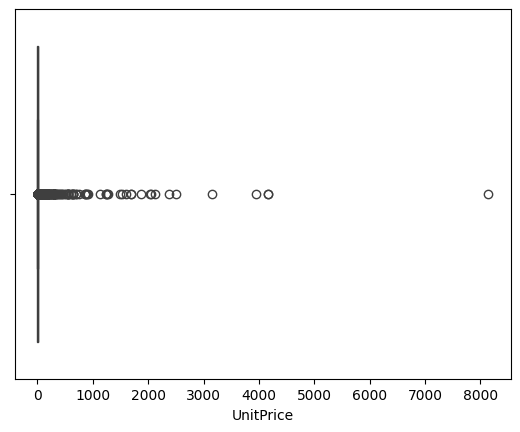

In [21]:
## Now let's investigate the UnitPrice column
sns.boxplot(x=df['UnitPrice'])

From the above figure we see data points in "**UnitPrice**" column are closely packed till 1000 value and beyond that they are sparsed. Earlier we noticed that the standard deviation for this column is around 69.315, so again we'll remove anything that is above 3*(standard deviation).

In [22]:
#known standard deviation for 'UnitPrice' column
std_dev = 69.315

# Calculate the mean for 'UnitPrice' column
mean_price = df['UnitPrice'].mean()

# Define threshold for outliers (3 times the known standard deviation)
threshold_price = 3 * std_dev

# Remove outliers from the DataFrame
df_no_outliers_price = df[df['UnitPrice'] <= mean_price + threshold_price]

# Check DataFrame after removing outliers
print(df_no_outliers_price.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


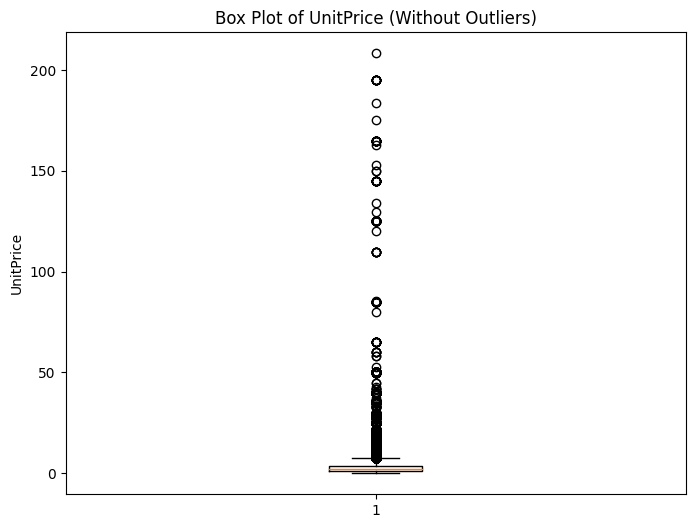

In [23]:
# Creating a box plot for the 'UnitPrice' column after removing outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df_no_outliers_price['UnitPrice'])
plt.title('Box Plot of UnitPrice (Without Outliers)')
plt.ylabel('UnitPrice')
plt.show()

Now the "**Unit Price**" column seems closely packed. We shouldn't need to remove more outlier as we may lose some important data points

# Going back to data types...
Now earlier we saw data type for "**InvoiceNo**" column marked as an object (or string) which might seem unusual since invoice numbers are typically numeric. However, this choice can be justified in certain contexts, especially if the invoice numbers include alphanumeric characters or leading zeros. Let's explore them before we start conducting any analysis.

In [26]:
# Convert the "InvoiceNo" column to strings
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

# Inspect the first few unique values of the "InvoiceNo" column
unique_invoice_numbers = df['InvoiceNo'].unique()
print(unique_invoice_numbers[:10])  # Print the first 10 unique values for inspection

# Check if all invoice numbers are numeric
all_numeric = df['InvoiceNo'].str.isnumeric().all()
print("All invoice numbers are numeric:", all_numeric)


['536365' '536366' '536367' '536368' '536369' '536370' '536371' '536372'
 '536373' '536374']
All invoice numbers are numeric: True


The "**InvoiceNO**" column contains only numeric values so it's safe to converti the column from object to numeric.

In [27]:
if all_numeric:
    df['InvoiceNo'] = df['InvoiceNo'].astype(int)
    print("InvoiceNo column converted to integer type.")
else:
    print("InvoiceNo column contains non-numeric values or leading zeros, so it remains as an object.")


InvoiceNo column converted to integer type.


# Let's begin the analysis
Q1. Are there specific months or days of the week that have higher sales?

<ipython-input-36-3b7a00423cf7>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')


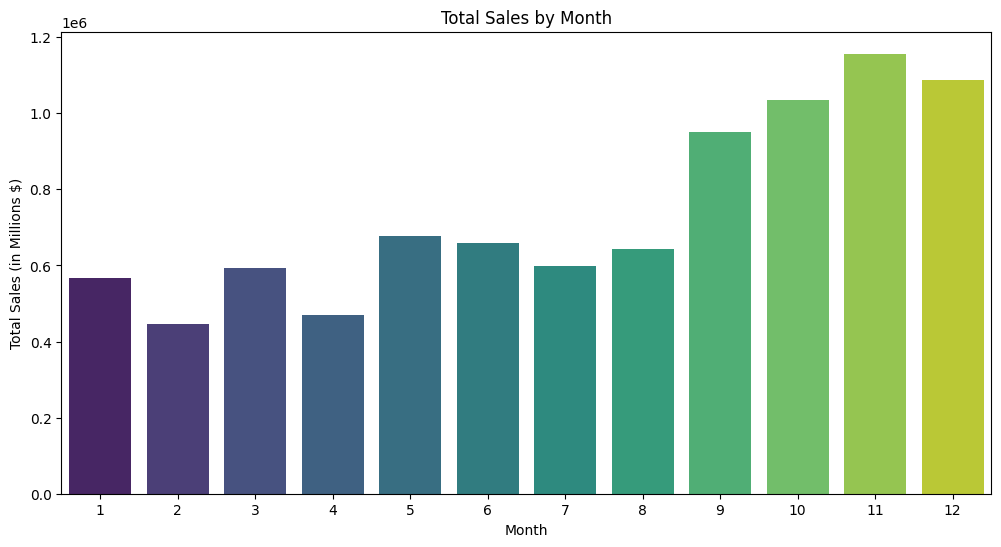

<ipython-input-36-3b7a00423cf7>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_sales.index, y=daily_sales.values, palette='viridis')


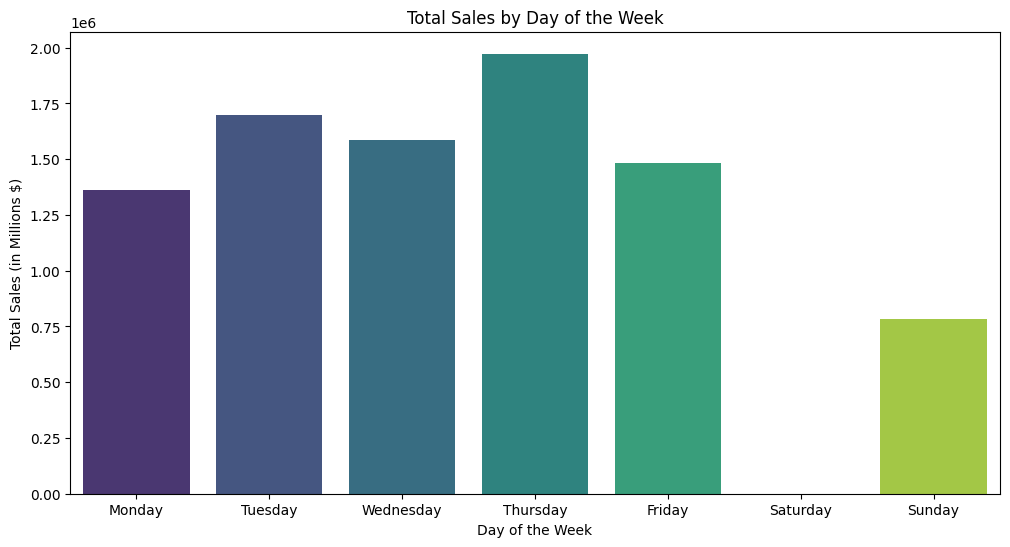

In [36]:
# ensure that the InvoiceDate is in Data time format
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])

# extract month and day of the week
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# mapping day of week to actual names
day_of_week = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4:'Friday', 5: 'Saturday', 6: 'Sunday'}
df['DayOfWeek'] = df['DayOfWeek'].map(day_of_week)

# calculate total sales for each transaction
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# group by Month and DayOfWeek to calculate Total Sales
monthly_sales = df.groupby('Month')['TotalSales'].sum()
daily_sales = df.groupby('DayOfWeek')['TotalSales'].sum()

# sort the daily_sales by order of the week
daily_sales = daily_sales.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# plotting sales by month
plt.figure(figsize=(12,6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales (in Millions $)')
plt.show()

# plotting sales by day of the week
plt.figure(figsize=(12,6))
sns.barplot(x=daily_sales.index, y=daily_sales.values, palette='viridis')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales (in Millions $)')
plt.show()

Based on the visuals we got, November is the highest selling month followed by December and Thursday is highest selling day of the week followed by Tuesday. But strangely Saturday has no sale, maybe there's a missing day in the dataset for Saturday or maybe the store remains closed on Saturdays. I don't have a solid answer for that.

Q2. Which is the best selling product?

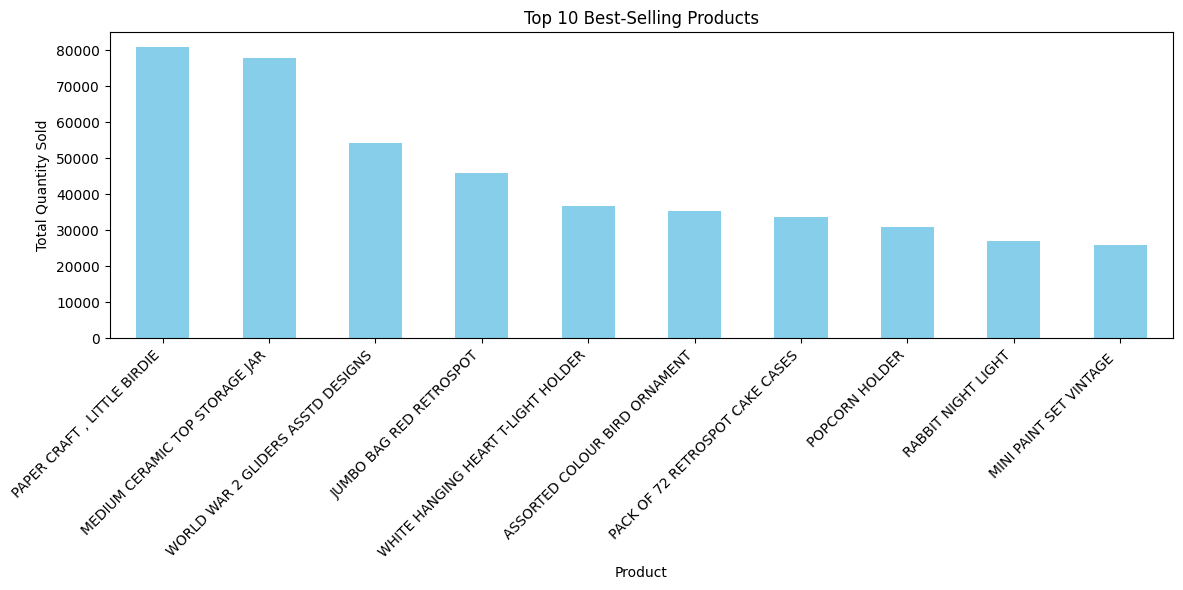

In [33]:
# Calculate total quantity sold for each product
product_sales = df.groupby('Description')['Quantity'].sum()

# Sort products by total quantity sold in descending order
best_selling_products = product_sales.sort_values(ascending=False).head(10)  # Adjust 10 to visualize more or fewer top-selling products

# Plotting the best-selling products
plt.figure(figsize=(12, 6))
best_selling_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Q3. Who are top 10 Store’s most valuable customer?

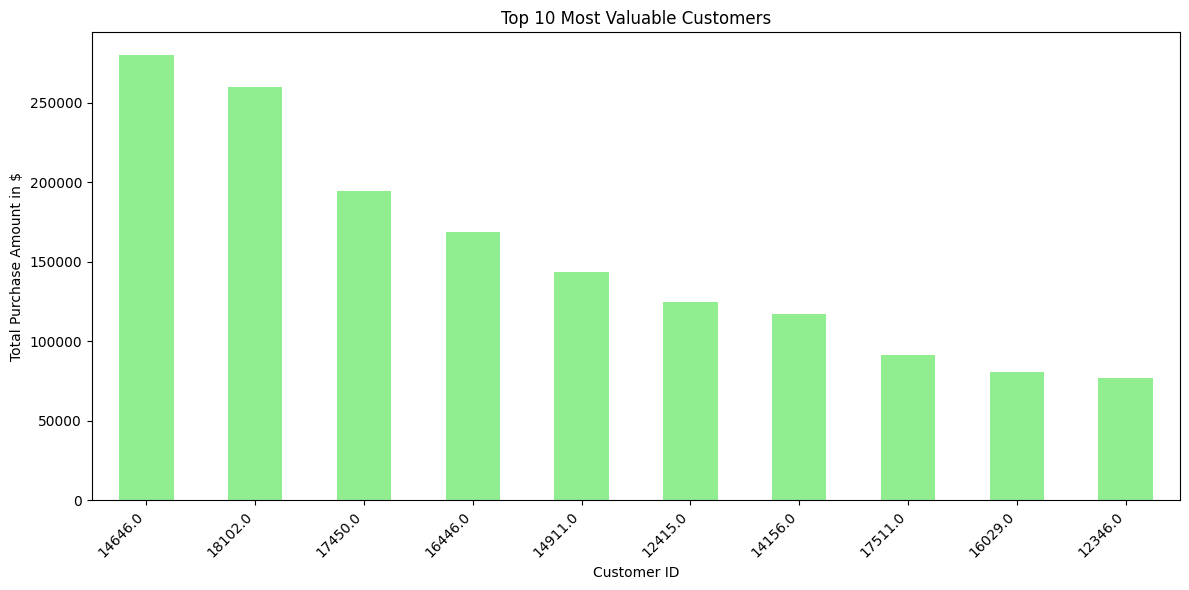

In [35]:
# Calculate total purchase amount for each customer
customer_purchase = df.groupby('CustomerID')['TotalSales'].sum()

# Sort customers by total purchase amount in descending order
top_customers = customer_purchase.sort_values(ascending=False).head(10)

# Plotting the top 10 most valuable customers
plt.figure(figsize=(12, 6))
top_customers.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Most Valuable Customers')
plt.xlabel('Customer ID')
plt.ylabel('Total Purchase Amount in $')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Q4. Top 10 countries contributing to sales ?

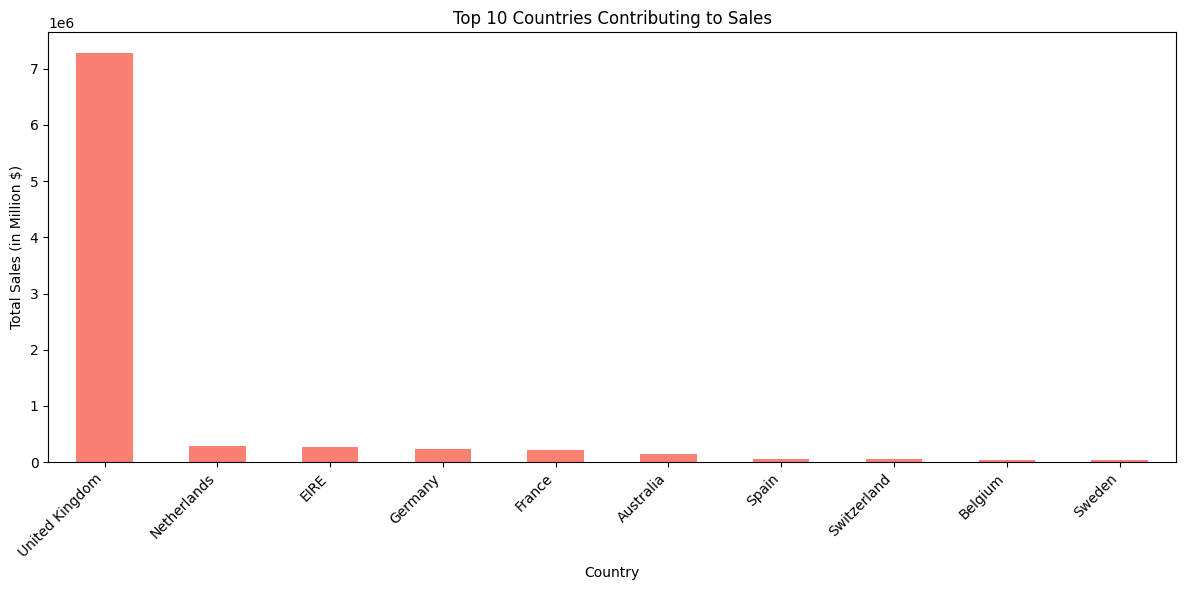

In [38]:
# Calculate total sales for each country
country_sales = df.groupby('Country')['TotalSales'].sum()

# Sort countries by total sales in descending order
top_countries = country_sales.sort_values(ascending=False).head(10)

# Plotting the top 10 countries contributing to sales
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='salmon')
plt.title('Top 10 Countries Contributing to Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales (in Million $)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Insights and recommendations
1. Our majority of sales come from September to December, with November being the busiest month. Therefore, we need to stock up on items in advance for these holiday months.
2. Throughout the year, Thursday is our busiest day of the week. It is observed that weekdays account for almost all of the sales, whereas weekends have fewer. We need to provide some offers on weekends to boost our sales.
3. Paper craft, Little Birdie, and Medium Ceramic Storage Jar are our highest-selling products. These are the products that we need to stock up on all the time; otherwise, we may lose a big chunk of revenue.
4. Customer ID 14646 and 18102 are our top two buyers. We need to give these loyal customers some loyalty bonuses once in a while so that we can retain them for the long term.
5. The United Kingdom is our top-selling destination, with over $7 million in sales in the Euro region. Since it is obvious that we're based in the UK, we need to take care of our UK customers well. However, we also need to reach out to neighboring countries to boost our sales, as sales are picking up in these regions.
